In [11]:
# do imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string 
import nltk 
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [12]:
# Scrape Tweets

import snscrape.modules.twitter as sntwitter
import pandas as pd

# declare variables and query
tweets_list = []
tweet_count = 1000
query = "Biden since:2021-01-01 until:2022-11-13" 

# use TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i>tweet_count:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df

,Datetime,Tweet Id,Text,Username
0,2022-11-12 23:59:58+00:00,1591581600252571648,@matthewjdowd Biden has done more damage in a ...,al89556573
1,2022-11-12 23:59:57+00:00,1591581597282684929,Obama and Biden should be sharing a cell.,TommyJAllTheWay
2,2022-11-12 23:59:57+00:00,1591581595722346496,@notcapnamerica @cbouzy No house majority mean...,ConservaWatch
3,2022-11-12 23:59:57+00:00,1591581595143933952,@wins_usa @Dennis_ppd_ @POTUS 😂,LesLo2021
4,2022-11-12 23:59:57+00:00,1591581594799800320,even if we got majority would current leadersh...,Buffyinnyc
...,...,...,...,...
996,2022-11-12 23:50:51+00:00,1591579308514246656,i do not mind give 20k to borrowers with 125k ...,rogerwa34716703
997,2022-11-12 23:50:51+00:00,1591579307369009154,Imagine if SBF had used these funds to contrib...,1Bprice
998,2022-11-12 23:50:51+00:00,1591579306094120961,@BarbaraCastor2 Well all the Gen Z's that vote...,rosie97213
999,2022-11-12 23:50:51+00:00,1591579305640951810,@ReallyAmerican1 I haven’t ever had to pay to ...,angie_anson


In [16]:
# clean tweets

def clean_string(a):
    
    # remove emoji's
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    a = emoji_pattern.sub(r'', a)

    # remove @ symbols and hashtags
    re_list = ['@[A-Za-z0–9_]+', '#']
    combined_re = re.compile( '|'.join( re_list) )
    a = re.sub(combined_re,'',a)

    # remove urls from text
    pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
    a = re.sub(pattern,'',a)
    output = a
    return output



# clean tweets with function we wrote above
df = tweets_df
for i in range(1001):
    df['Text'][i] = clean_string(df.iloc[i]['Text'])
    
for i in range(5):
    output = df.iloc[i]['Text']
    print(output)
    print('\n')


 Biden has done more damage in a short time than any President of my life time.


Obama and Biden should be sharing a cell.


  No house majority means endless Hunter Biden investigations and impeachment hearings. No meaningful legislation will be passed. And that’s just for starters. No house majority is a disaster and we can thank New York and Florida.  But expect ally New York democrats.


   


even if we got majority would current leadership impeach biden investigate hunter investigate Ilhan omar for campaign funds abuse etc no. they wouldn't they'd whine on social




In [17]:
# save to csvs just in case
df.to_csv(r'C:\Users\maxma\Downloads\CS\NLP\Full Walk Through\BidenTweets.csv')

In [19]:
# generate word cloud

from nltk.tokenize import WordPunctTokenizer
tk = WordPunctTokenizer()

def tokenize_and_process(d):
    
    d = str(d)
    lower_case = d.lower()
    words = tk.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

processed_tweets = []
print ('Processsing and tokenizing tweets')
for i in range(1000):
    if i % 100 == 0:
        print("Tweets {} of {} have been processed".format(i, 1000))
    processed_tweets.append(tokenize_and_process(df.Text[i]))
    
    
string = pd.Series(processed_tweets).str.cat(sep=' ')

Processsing and tokenizing tweets
Tweets 0 of 1000 have been processed
Tweets 100 of 1000 have been processed
Tweets 200 of 1000 have been processed
Tweets 300 of 1000 have been processed
Tweets 400 of 1000 have been processed
Tweets 500 of 1000 have been processed
Tweets 600 of 1000 have been processed
Tweets 700 of 1000 have been processed
Tweets 800 of 1000 have been processed
Tweets 900 of 1000 have been processed


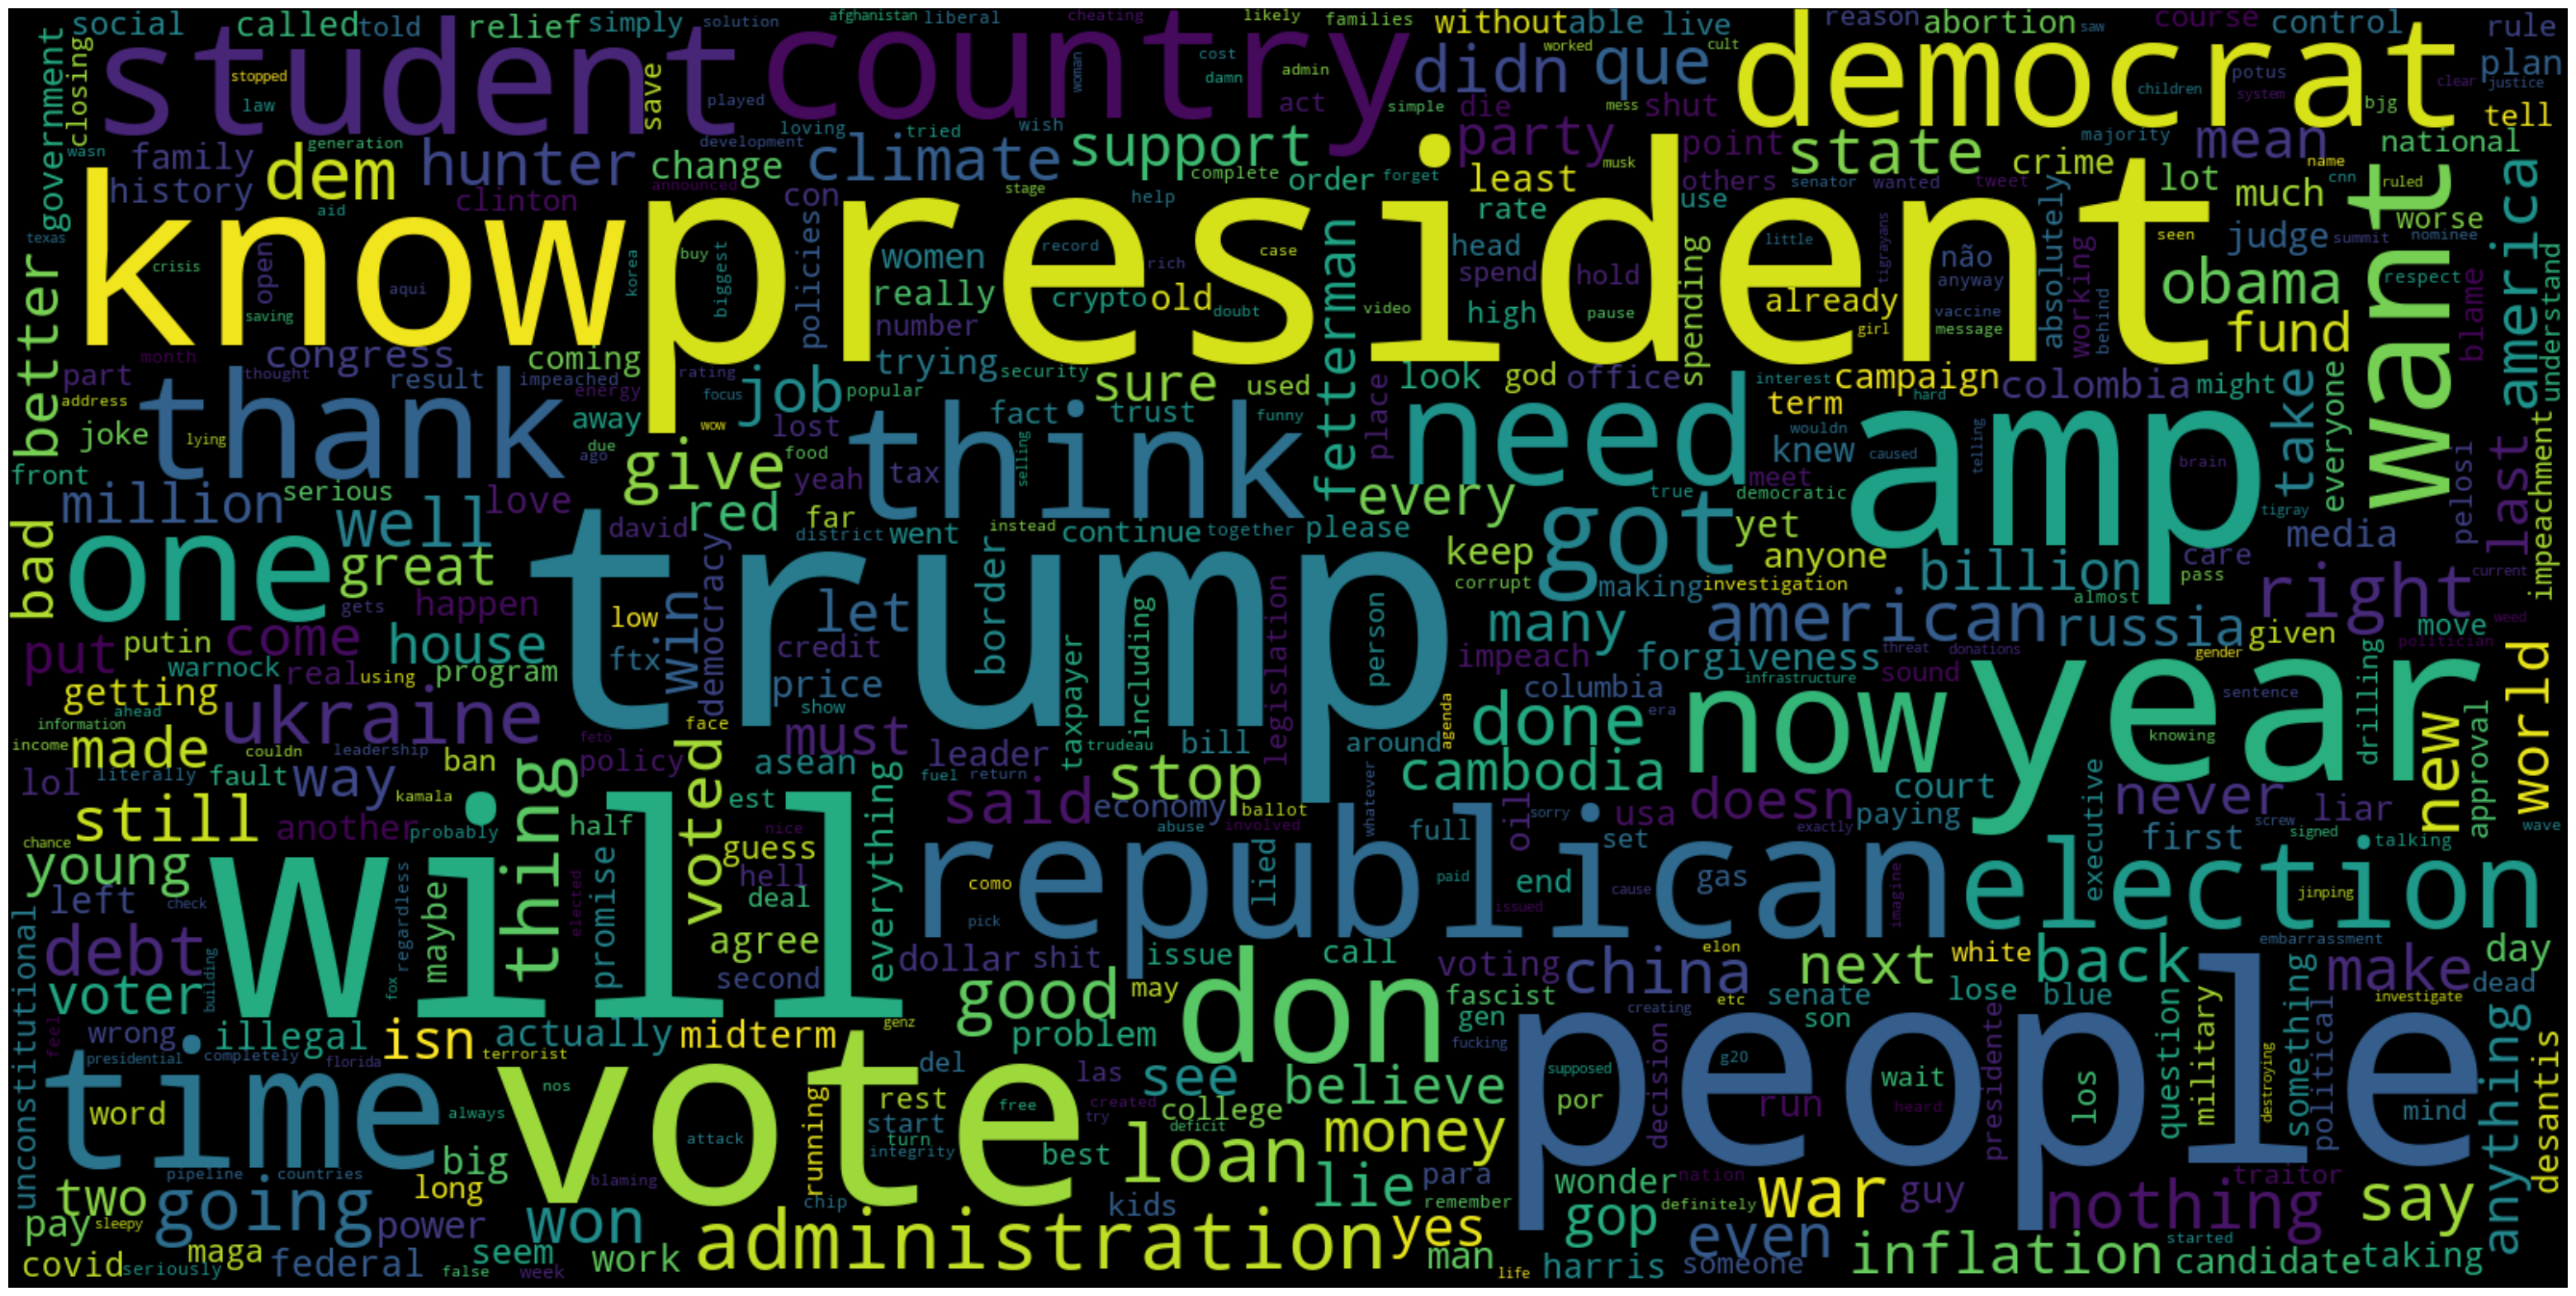

In [21]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
custom_stopwords = ['biden','joe']
stopwords.update(custom_stopwords)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=500,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()